<a href="https://colab.research.google.com/github/ckdlsqpf/projectmanager/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_excel('yelp.xlsx')
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape  # 데이터형태: 1000행 2열

(1000, 2)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')
# max_features: 문서단어행렬에 포함시킬 최대(max)의 단어(feature) 수
# stop_words: 분석에서 제외할 불용어를 설정


In [6]:
dtm = cv.fit_transform(df['review'])

In [8]:
dtm.shape

(1000, 500)

In [11]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

In [22]:
word_count= pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat})

In [20]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70
...,...,...
291,oven,2
146,finish,2
294,overwhelmed,2
297,pace,2


In [18]:
word_count.to_excel('word_count.xlsx')

In [ ]:
# word cloud
!pip install wordcloud

In [29]:
from wordcloud import WordCloud

wc= WordCloud(
    font_path='NanumGothic.ttf',    # 글꼴파일이있을경우
    background_color='white',       #배경색
    max_words=100,                  #시각화할단어개수
    width=400,                      #가로크기
    height=300)                     #세로크기261

# word_count를 사전(dict)형태로 변환
count_dic= dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)

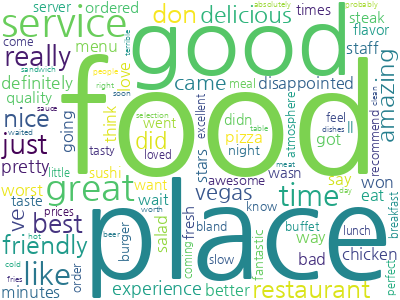

In [30]:
cloud.to_image()

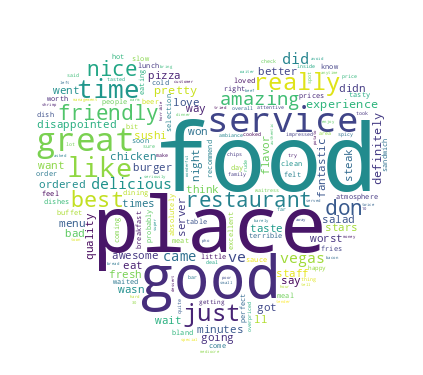

In [31]:
from PIL import Image
import numpy as np
mask = Image.open('love.png').convert('L')  # 흑백으로 변환
mask = np.asarray(mask)

wc = WordCloud(background_color='white', mask=mask)
cloud = wc.fit_words(count_dic)
cloud.to_image()



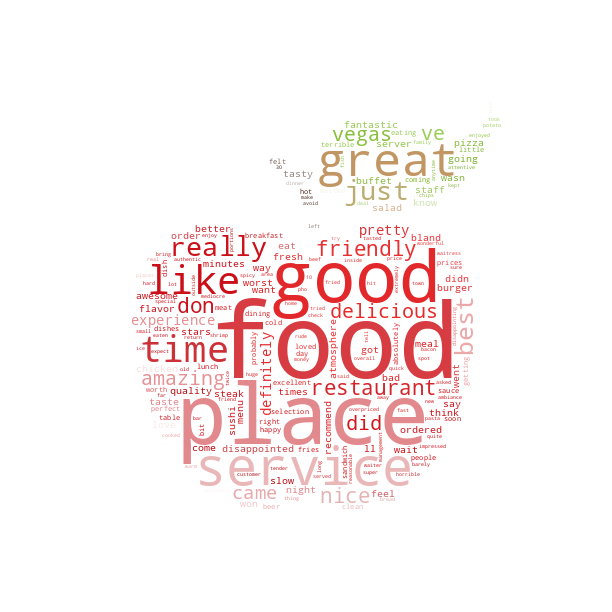

In [36]:
from wordcloud import ImageColorGenerator

mask = np.asarray(Image.open('apple.png'))

wc = WordCloud(background_color='white', mask=mask)
cloud = wc.fit_words(count_dic)

cloud.to_image()
color_func= ImageColorGenerator(mask)
cloud=wc.recolor(color_func = color_func)
cloud.to_image()

In [ ]:
# 한글로 된 워드클라우드 만들기
!pip install kiwipiepy

In [40]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

kiwi.tokenize('오늘은 자연어 처리를 배우기 좋은 날이다.')

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='자연어', tag='NNP', start=4, len=3),
 Token(form='처리', tag='NNG', start=8, len=2),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='배우', tag='VV', start=12, len=2),
 Token(form='기', tag='ETN', start=14, len=1),
 Token(form='좋', tag='VA', start=16, len=1),
 Token(form='은', tag='ETM', start=17, len=1),
 Token(form='날', tag='NNG', start=19, len=1),
 Token(form='이', tag='VCP', start=20, len=1),
 Token(form='다', tag='EF', start=21, len=1),
 Token(form='.', tag='SF', start=22, len=1)]

In [42]:
def extract_nouns(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

list(extract_nouns('어제는홍차를마시고, 오늘은커피를마셨다.'))

['어제', '홍차', '오늘', '커피']

In [43]:
kiwi.tokenize('인공지능')

[Token(form='인공', tag='NNG', start=0, len=2),
 Token(form='지능', tag='NNG', start=2, len=2)]

In [44]:
df = pd.read_csv('news_ai.csv')
df.head(5)

,주소,본문
0,http://v.media.daum.net/v/20210819190006502,\n \n \n 편집자주\n ...
1,http://v.media.daum.net/v/20210903105715535,\n \n \n \n ...
2,http://v.media.daum.net/v/20210831154007242,\n \n \n \n ...
3,http://v.media.daum.net/v/20210819152734401,\n \n \n \n ...
4,http://v.media.daum.net/v/20210730090007999,\n \n \n \n ...


In [45]:
kiwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG')

cv = CountVectorizer(max_features = 100, tokenizer=extract_nouns)
dtm = cv.fit_transform(df['본문'])
word_count = pd.DataFrame({
    '단어':cv.get_feature_names_out(),
    '빈도':dtm.sum(axis=0).flat
})

word_count.sort_values('빈도', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,단어,빈도
18,기술,279
70,인공지능,247
12,교육,146
2,개발,144
80,제공,116
76,전형,109
45,서비스,107
22,대표,106
84,지원,103
41,산업,101


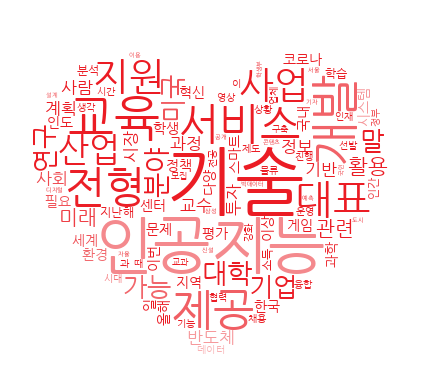

In [47]:
count_dic = dict(zip(word_count.단어, word_count.빈도))
mask = np.asarray(Image.open('love.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', font_path='NanumGothic.ttf', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()